In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('Chocolate Sales (2).csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset Shape: (3282, 6)

Column Names:
['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped']

First few rows:


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [3]:
# Check data types and missing values
print("Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
df.describe(include='all')

Data Types:
Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object

Missing Values:
Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

Basic Statistics:


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,3282,3282,3282,3282,3282,3282.000000
unique,25,6,22,504,3013,NaN
top,Kelci Walkden,Australia,50% Dark Bites,13/01/2024,"$2,317.00",NaN
freq,162,615,180,16,5,NaN
mean,NaN,NaN,NaN,NaN,NaN,164.666971
std,NaN,NaN,NaN,NaN,NaN,124.024736
min,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,71.000000
50%,NaN,NaN,NaN,NaN,NaN,137.000000
75%,NaN,NaN,NaN,NaN,NaN,232.000000


In [4]:
# Clean the Amount column - remove $ and commas, convert to float
df['Amount'] = df['Amount'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract additional date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Quarter'] = df['Date'].dt.quarter
df['Day_of_Week'] = df['Date'].dt.day_name()

# Calculate price per box
df['Price_per_Box'] = df['Amount'] / df['Boxes Shipped']

print("Data cleaning completed!")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"\nSample of cleaned data:")
df.head()

Data cleaning completed!

Date range: 2022-01-03 00:00:00 to 2024-08-31 00:00:00

Sample of cleaned data:


,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Year,Month,Month_Name,Quarter,Day_of_Week,Price_per_Box
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022,1,January,1,Tuesday,29.555556
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,2022,8,August,3,Monday,84.000000
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022,7,July,3,Thursday,49.461538
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022,4,April,2,Wednesday,37.210526
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022,2,February,1,Thursday,74.375000


## 3. Exploratory Data Analysis

In [5]:
# Summary statistics for numerical columns
print("Summary Statistics:")
print(df[['Amount', 'Boxes Shipped', 'Price_per_Box']].describe())

Summary Statistics:
             Amount  Boxes Shipped  Price_per_Box
count   3282.000000    3282.000000    3282.000000
mean    6030.338775     164.666971     111.340158
std     4393.980200     124.024736     295.314947
min        7.000000       1.000000       0.013514
25%     2521.495000      71.000000      15.460976
50%     5225.500000     137.000000      38.192954
75%     8556.842500     232.000000      83.808388
max    26170.950000     778.000000    4692.360000


In [6]:
# Count unique values in categorical columns
print("Unique Sales Persons:", df['Sales Person'].nunique())
print("Unique Countries:", df['Country'].nunique())
print("Unique Products:", df['Product'].nunique())
print("\nCountries:")
print(df['Country'].value_counts())
print("\nTop 10 Products:")
print(df['Product'].value_counts().head(10))

Unique Sales Persons: 25
Unique Countries: 6
Unique Products: 22

Countries:
Country
Australia      615
India          552
USA            537
UK             534
Canada         525
New Zealand    519
Name: count, dtype: int64

Top 10 Products:
Product
50% Dark Bites         180
Eclairs                180
Smooth Sliky Salty     177
White Choc             174
Drinking Coco          168
Spicy Special Slims    162
Organic Choco Syrup    156
After Nines            150
85% Dark Bars          150
Fruit & Nut Bars       150
Name: count, dtype: int64


## 4. Sales Analysis by Different Dimensions

In [7]:
# Total sales metrics
total_sales = df['Amount'].sum()
total_boxes = df['Boxes Shipped'].sum()
avg_price_per_box = df['Price_per_Box'].mean()
total_transactions = len(df)

print("=== OVERALL SALES METRICS ===")
print(f"Total Sales Amount: ${total_sales:,.2f}")
print(f"Total Boxes Shipped: {total_boxes:,.0f}")
print(f"Average Price per Box: ${avg_price_per_box:.2f}")
print(f"Total Transactions: {total_transactions:,}")
print(f"Average Transaction Value: ${total_sales/total_transactions:,.2f}")

=== OVERALL SALES METRICS ===
Total Sales Amount: $19,791,571.86
Total Boxes Shipped: 540,437
Average Price per Box: $111.34
Total Transactions: 3,282
Average Transaction Value: $6,030.34


In [8]:
# Sales by Country
sales_by_country = df.groupby('Country').agg({
    'Amount': ['sum', 'mean', 'count'],
    'Boxes Shipped': 'sum'
}).round(2)
sales_by_country.columns = ['Total_Sales', 'Avg_Sale', 'Transaction_Count', 'Total_Boxes']
sales_by_country = sales_by_country.sort_values('Total_Sales', ascending=False)
print("Sales by Country:")
print(sales_by_country)

Sales by Country:
             Total_Sales  Avg_Sale  Transaction_Count  Total_Boxes
Country                                                           
Australia     3646444.35   5929.18                615        99618
UK            3365388.90   6302.23                534        92523
India         3343730.83   6057.48                552        89968
USA           3313858.09   6171.06                537        81820
Canada        3078495.65   5863.80                525        95158
New Zealand   3043654.04   5864.46                519        81350


In [9]:
# Sales by Product
sales_by_product = df.groupby('Product').agg({
    'Amount': ['sum', 'mean', 'count'],
    'Boxes Shipped': 'sum'
}).round(2)
sales_by_product.columns = ['Total_Sales', 'Avg_Sale', 'Transaction_Count', 'Total_Boxes']
sales_by_product = sales_by_product.sort_values('Total_Sales', ascending=False)
print("Top 15 Products by Sales:")
print(sales_by_product.head(15))

Top 15 Products by Sales:
                     Total_Sales  Avg_Sale  Transaction_Count  Total_Boxes
Product                                                                   
Smooth Sliky Salty    1120201.09   6328.82                177        26969
50% Dark Bites        1087659.35   6042.55                180        29810
White Choc            1054257.00   6058.95                174        25158
Peanut Butter Cubes   1036591.09   7051.64                147        25339
Eclairs                996947.96   5538.60                180        26678
99% Dark & Pure        960033.45   6530.84                147        24818
85% Dark Bars          955268.24   6368.45                150        23828
Organic Choco Syrup    945345.73   6059.91                156        23602
Spicy Special Slims    938131.69   5790.94                162        26662
Mint Chip Choco        904989.55   6703.63                135        25149
Almond Choco           890454.65   6183.71                144        20558

In [10]:
# Top Sales Persons
top_salespersons = df.groupby('Sales Person').agg({
    'Amount': ['sum', 'mean', 'count'],
    'Boxes Shipped': 'sum'
}).round(2)
top_salespersons.columns = ['Total_Sales', 'Avg_Sale', 'Transaction_Count', 'Total_Boxes']
top_salespersons = top_salespersons.sort_values('Total_Sales', ascending=False)
print("Top 15 Sales Persons:")
print(top_salespersons.head(15))

Top 15 Sales Persons:
                     Total_Sales  Avg_Sale  Transaction_Count  Total_Boxes
Sales Person                                                              
Ches Bonnell          1022599.96   7101.39                144        23070
Oby Sorrel            1017204.12   6919.76                147        26390
Madelene Upcott       1010028.72   7481.69                135        22199
Kelci Walkden         1002929.10   6190.92                162        26605
Brien Boise            997326.48   6272.49                159        24738
Van Tuxwell            974425.09   6368.79                153        20627
Dennison Crosswaite    931849.57   6339.11                147        26862
Beverie Moffet         892421.37   5949.48                150        28027
Kaine Padly            849062.76   6289.35                135        22134
Marney O'Breen         836427.63   6195.76                135        24595
Barr Faughny           830826.91   6440.52                129        19520
Rod

In [11]:
# Sales by Month
sales_by_month = df.groupby('Month_Name').agg({
    'Amount': ['sum', 'mean', 'count'],
    'Boxes Shipped': 'sum'
}).round(2)
sales_by_month.columns = ['Total_Sales', 'Avg_Sale', 'Transaction_Count', 'Total_Boxes']

# Order by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
sales_by_month = sales_by_month.reindex([m for m in month_order if m in sales_by_month.index])
print("Sales by Month:")
print(sales_by_month)

Sales by Month:
            Total_Sales  Avg_Sale  Transaction_Count  Total_Boxes
Month_Name                                                       
January      2868712.59   6209.33                462        84162
February     2232096.90   6763.93                330        54917
March        2404769.29   6119.01                393        59633
April        2161927.22   6107.14                354        64216
May          2415750.57   5964.82                405        66662
June         2773931.94   5672.66                489        80357
July         2567532.29   5743.92                447        69808
August       2366851.06   5887.69                402        60682


In [12]:
# Sales by Quarter
sales_by_quarter = df.groupby('Quarter').agg({
    'Amount': ['sum', 'mean', 'count'],
    'Boxes Shipped': 'sum'
}).round(2)
sales_by_quarter.columns = ['Total_Sales', 'Avg_Sale', 'Transaction_Count', 'Total_Boxes']
print("Sales by Quarter:")
print(sales_by_quarter)

Sales by Quarter:
         Total_Sales  Avg_Sale  Transaction_Count  Total_Boxes
Quarter                                                       
1         7505578.78   6333.82               1185       198712
2         7351609.73   5890.71               1248       211235
3         4934383.35   5811.99                849       130490


In [13]:
# Sales by Day of Week
sales_by_day = df.groupby('Day_of_Week').agg({
    'Amount': ['sum', 'mean', 'count'],
    'Boxes Shipped': 'sum'
}).round(2)
sales_by_day.columns = ['Total_Sales', 'Avg_Sale', 'Transaction_Count', 'Total_Boxes']

# Order by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex([d for d in day_order if d in sales_by_day.index])
print("Sales by Day of Week:")
print(sales_by_day)

Sales by Day of Week:
             Total_Sales  Avg_Sale  Transaction_Count  Total_Boxes
Day_of_Week                                                       
Monday        2322538.78   5791.87                401        66568
Tuesday       2775047.84   5866.91                473        76120
Wednesday     3043032.95   5966.73                510        84067
Thursday      4052553.28   6057.63                669       109703
Friday        3750049.65   6117.54                613       100454
Saturday      2545771.28   6209.20                410        70381
Sunday        1302578.08   6323.19                206        33144


## 5. Visualizations

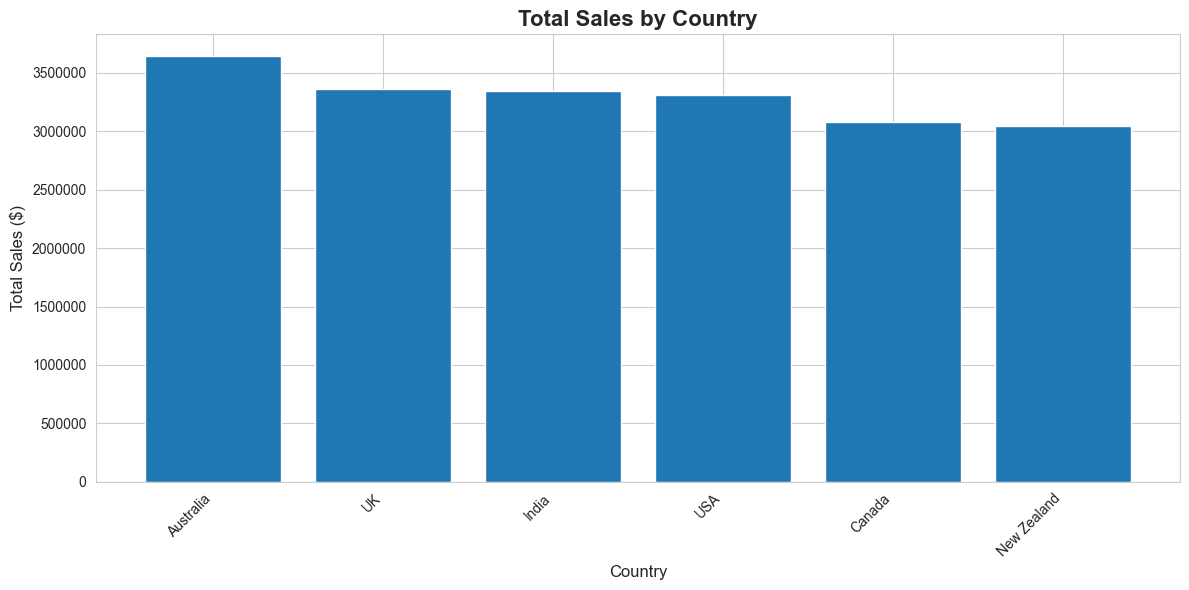

In [14]:
# 1. Sales by Country
plt.figure(figsize=(12, 6))
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
plt.bar(range(len(country_sales)), country_sales.values)
plt.xticks(range(len(country_sales)), country_sales.index, rotation=45, ha='right')
plt.title('Total Sales by Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

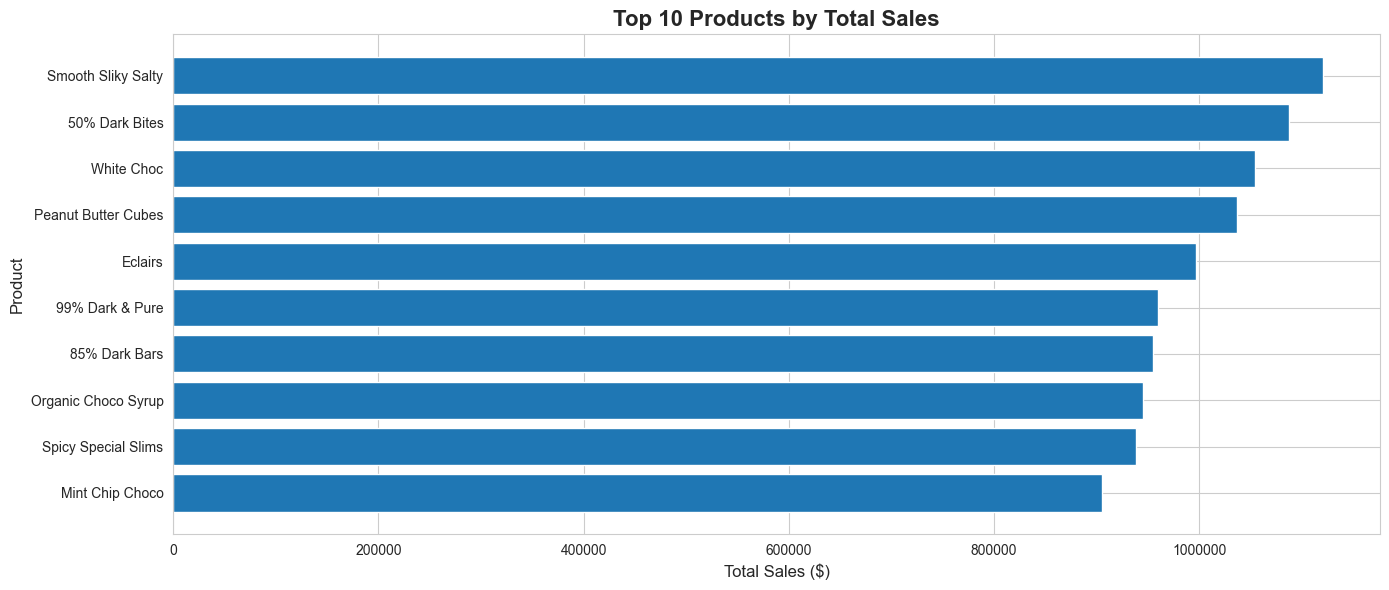

In [15]:
# 2. Top 10 Products by Sales
plt.figure(figsize=(14, 6))
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)
plt.barh(range(len(top_products)), top_products.values)
plt.yticks(range(len(top_products)), top_products.index)
plt.title('Top 10 Products by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

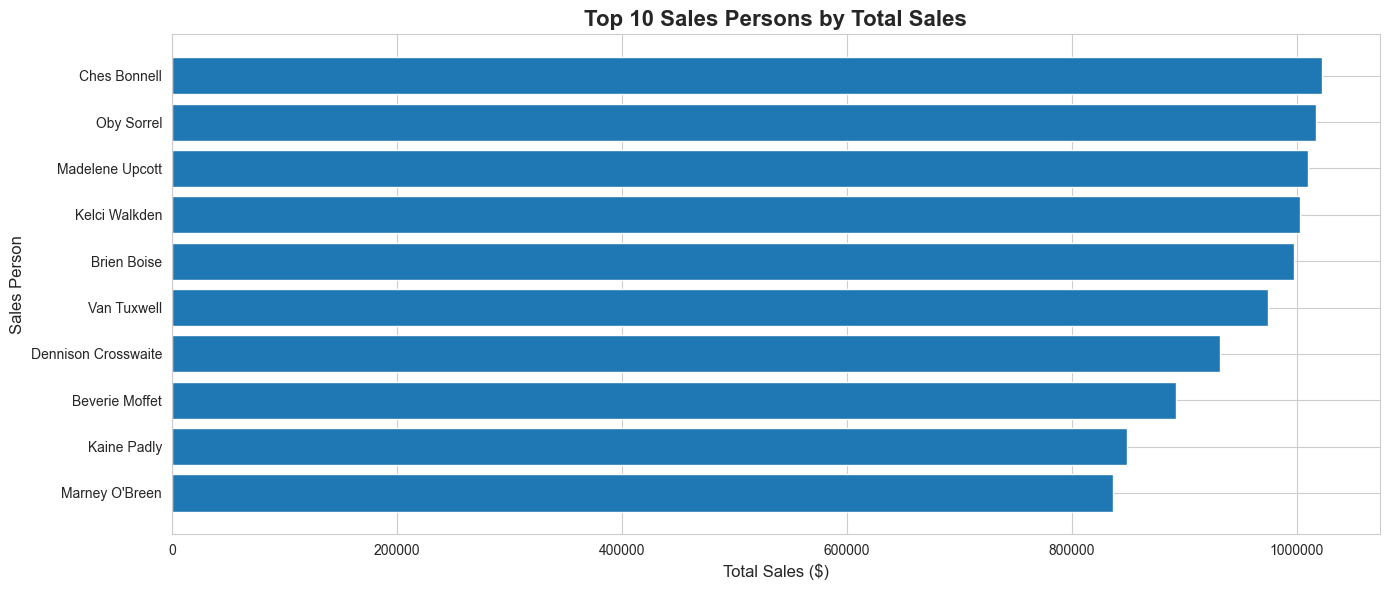

In [16]:
# 3. Top 10 Sales Persons
plt.figure(figsize=(14, 6))
top_sales = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(10)
plt.barh(range(len(top_sales)), top_sales.values)
plt.yticks(range(len(top_sales)), top_sales.index)
plt.title('Top 10 Sales Persons by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Sales Person', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

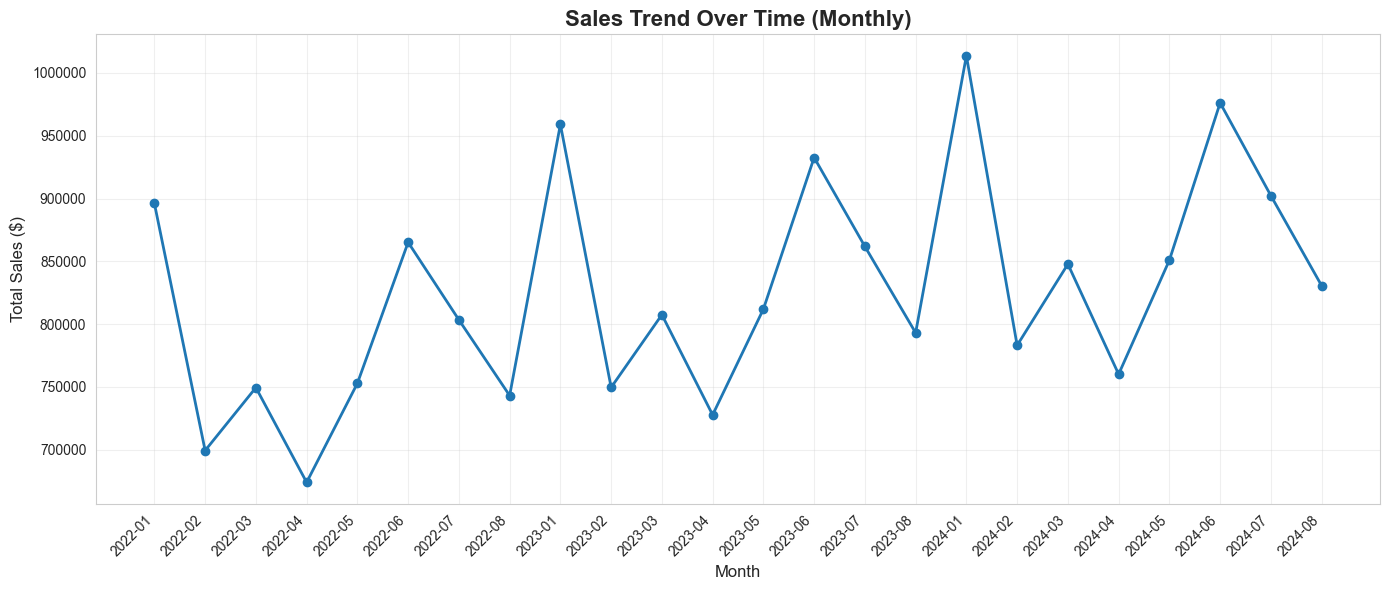

In [17]:
# 4. Sales Trend Over Time
plt.figure(figsize=(14, 6))
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
monthly_sales.index = monthly_sales.index.astype(str)
plt.plot(range(len(monthly_sales)), monthly_sales.values, marker='o', linewidth=2, markersize=6)
plt.xticks(range(len(monthly_sales)), monthly_sales.index, rotation=45, ha='right')
plt.title('Sales Trend Over Time (Monthly)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

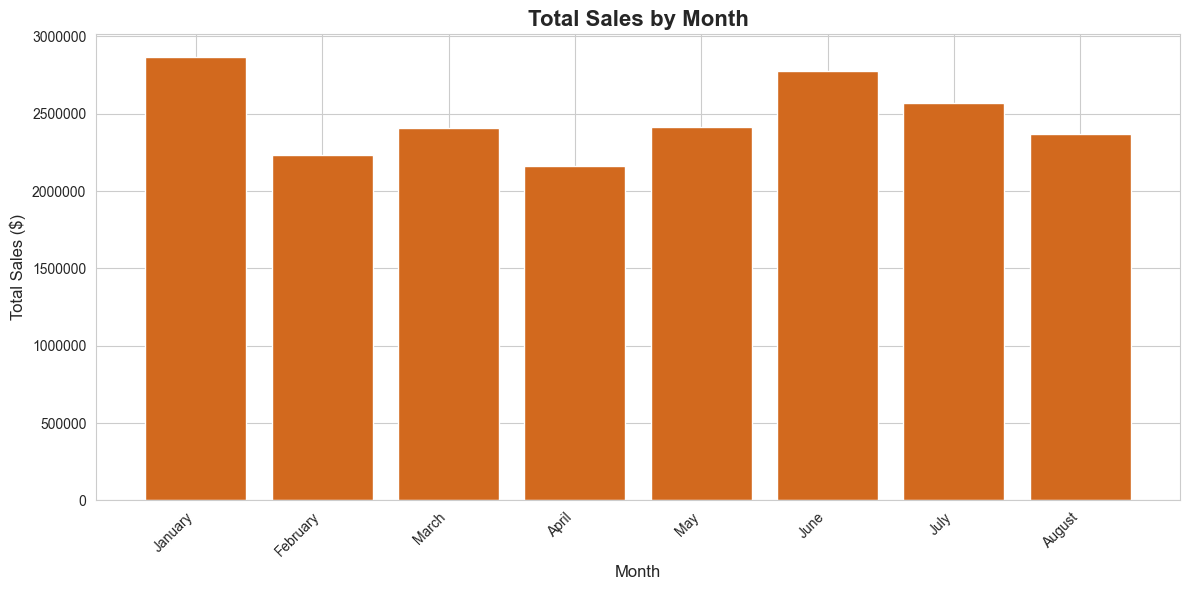

In [18]:
# 5. Sales by Month
plt.figure(figsize=(12, 6))
month_sales = df.groupby('Month_Name')['Amount'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_sales = month_sales.reindex([m for m in month_order if m in month_sales.index])
plt.bar(range(len(month_sales)), month_sales.values, color='chocolate')
plt.xticks(range(len(month_sales)), month_sales.index, rotation=45, ha='right')
plt.title('Total Sales by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

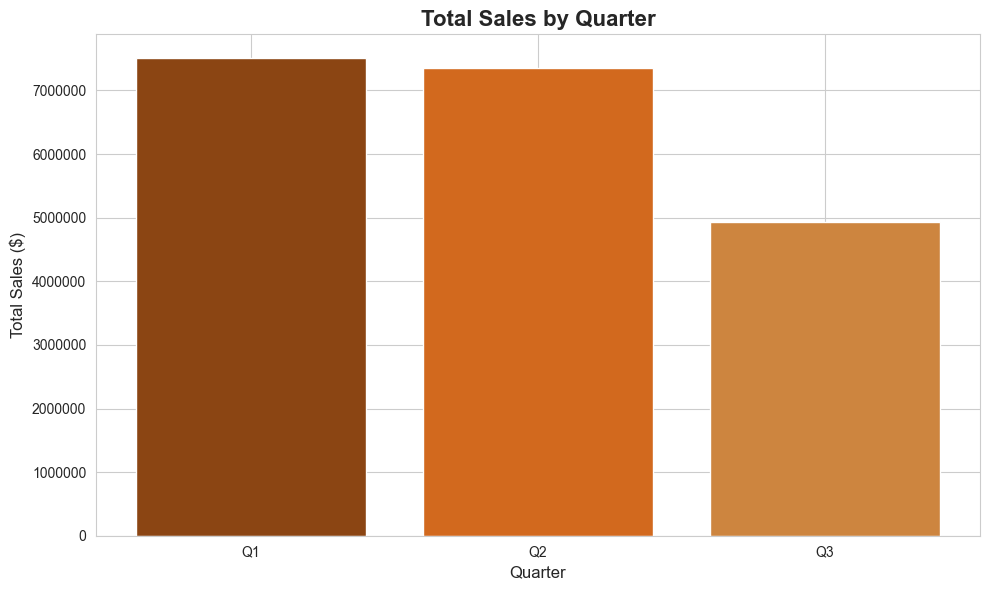

In [19]:
# 6. Sales by Quarter
plt.figure(figsize=(10, 6))
quarter_sales = df.groupby('Quarter')['Amount'].sum()
plt.bar(quarter_sales.index, quarter_sales.values, color=['#8B4513', '#D2691E', '#CD853F', '#DEB887'])
plt.title('Total Sales by Quarter', fontsize=16, fontweight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(quarter_sales.index, [f'Q{q}' for q in quarter_sales.index])
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

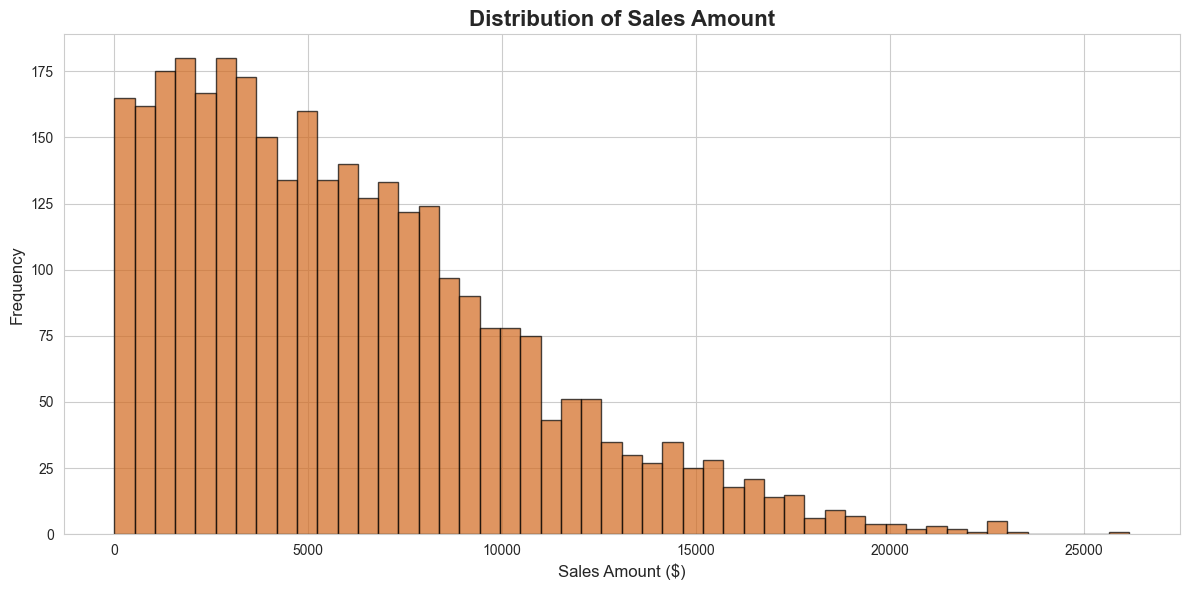

In [20]:
# 7. Distribution of Sales Amount
plt.figure(figsize=(12, 6))
plt.hist(df['Amount'], bins=50, edgecolor='black', alpha=0.7, color='chocolate')
plt.title('Distribution of Sales Amount', fontsize=16, fontweight='bold')
plt.xlabel('Sales Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

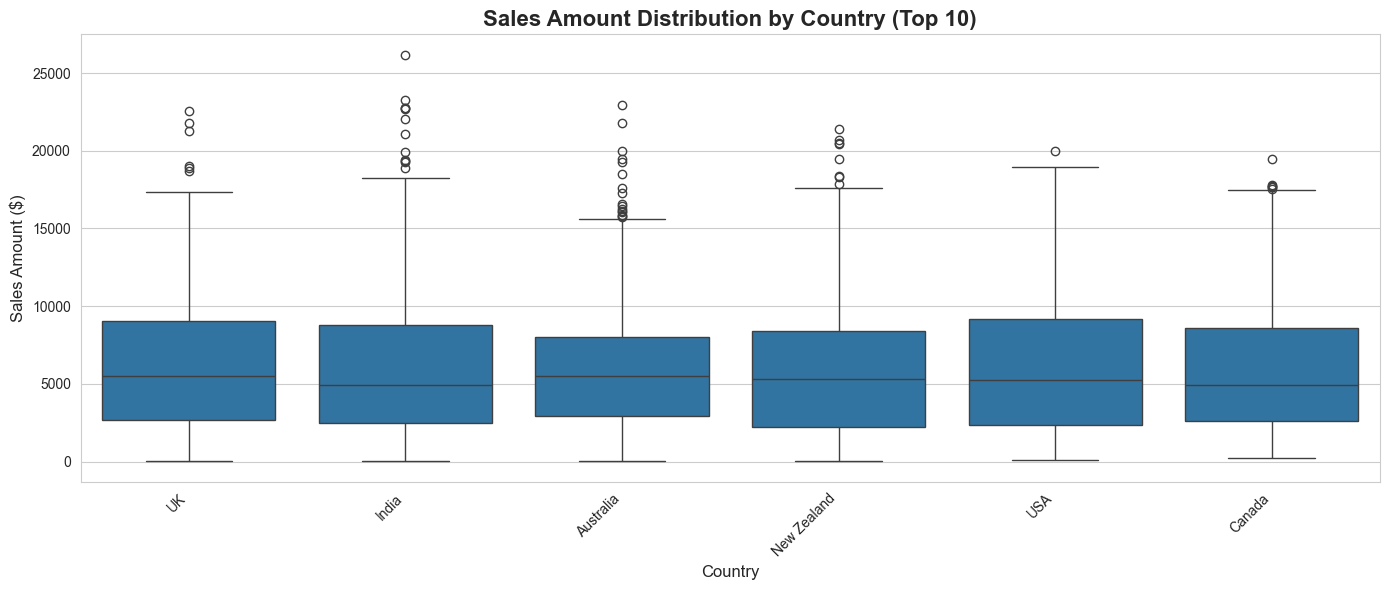

In [21]:
# 8. Box Plot: Sales Amount by Country
plt.figure(figsize=(14, 6))
df_sorted = df.sort_values('Amount', ascending=False)
top_countries = df['Country'].value_counts().head(10).index
df_filtered = df[df['Country'].isin(top_countries)]
sns.boxplot(data=df_filtered, x='Country', y='Amount')
plt.title('Sales Amount Distribution by Country (Top 10)', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Sales Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

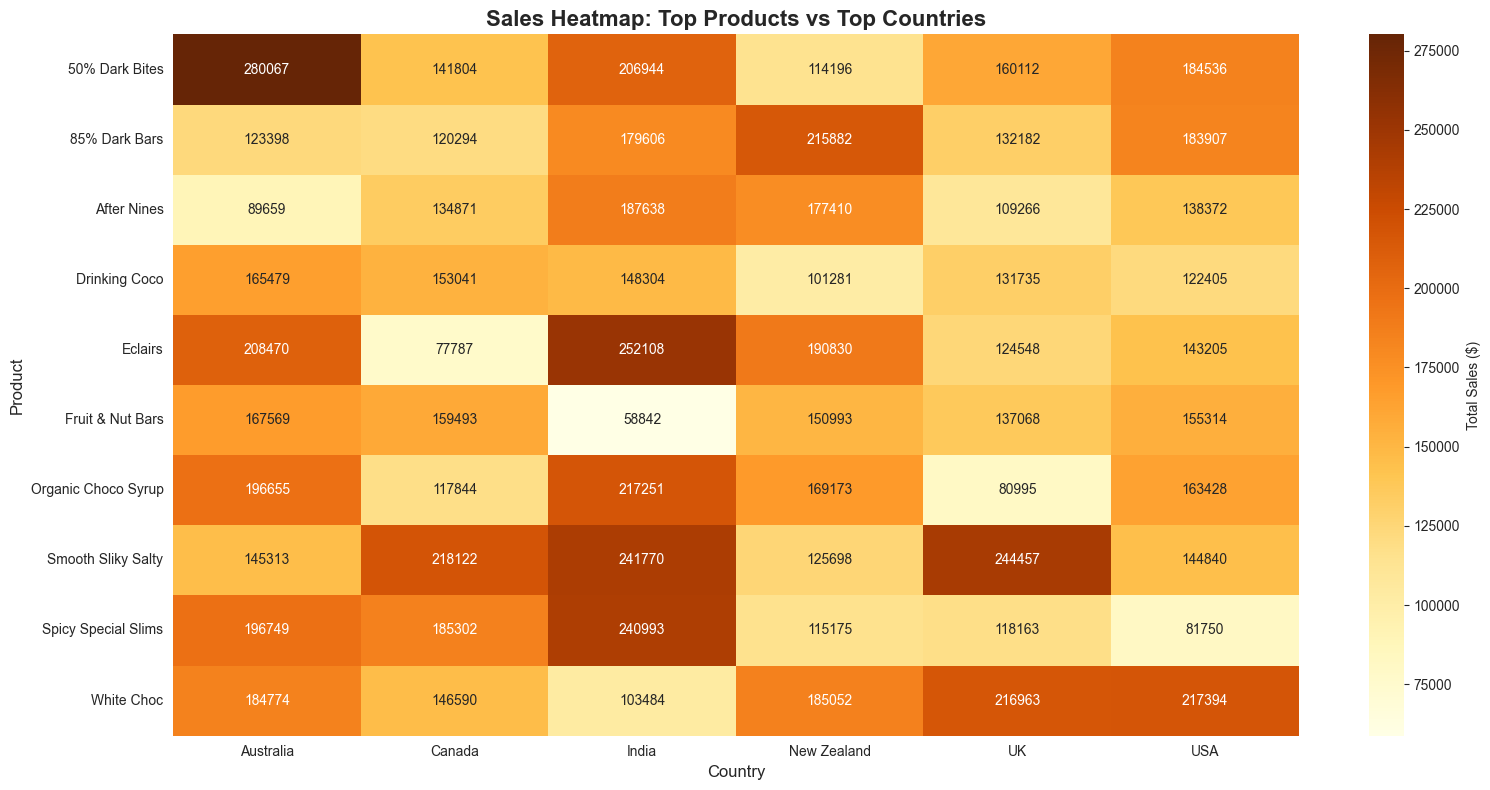

In [22]:
# 9. Heatmap: Sales by Country and Product (Top combinations)
plt.figure(figsize=(16, 8))
top_products = df['Product'].value_counts().head(10).index
top_countries = df['Country'].value_counts().head(10).index
df_filtered = df[(df['Product'].isin(top_products)) & (df['Country'].isin(top_countries))]
pivot_table = df_filtered.pivot_table(values='Amount', index='Product', columns='Country', aggfunc='sum', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrBr', cbar_kws={'label': 'Total Sales ($)'})
plt.title('Sales Heatmap: Top Products vs Top Countries', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.tight_layout()
plt.show()

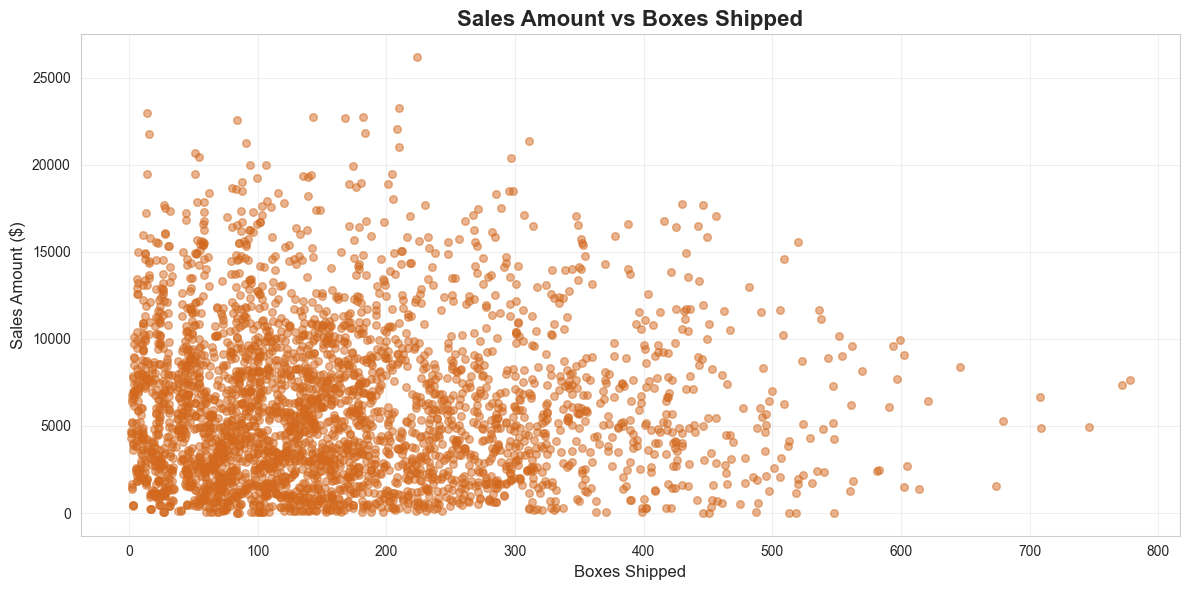


Correlation between Amount and Boxes Shipped: -0.013


In [23]:
# 10. Scatter Plot: Amount vs Boxes Shipped
plt.figure(figsize=(12, 6))
plt.scatter(df['Boxes Shipped'], df['Amount'], alpha=0.5, color='chocolate', s=30)
plt.title('Sales Amount vs Boxes Shipped', fontsize=16, fontweight='bold')
plt.xlabel('Boxes Shipped', fontsize=12)
plt.ylabel('Sales Amount ($)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['Amount'].corr(df['Boxes Shipped'])
print(f"\nCorrelation between Amount and Boxes Shipped: {correlation:.3f}")